K-Means Clustering
K-Means is a popular unsupervised learning algorithm used to group data into 
𝑘
k clusters based on their similarity. It minimizes the intra-cluster variance (data points in the same cluster are close together) and maximizes inter-cluster distance (clusters are far apart).
#  big point clustering if use in EDA
How Does K-Means Work?
Choose the Number of Clusters (
𝑘
k): Decide the number of clusters you want to create.

Initialization: Randomly select 
𝑘
k points from the dataset as the initial centroids.

Assign Data Points to Clusters: Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).

Recompute Centroids: Calculate the new centroids by taking the mean of all points assigned to each cluster.

Repeat Steps 3–4: Iterate until the centroids stabilize (no significant change) or a maximum number of iterations is reached.

Output:

Final cluster assignments for data points.
Cluster centroids.
How It Works
Choose 
𝑘
k: Number of clusters.
Initialize: Randomly select 
𝑘
k centroids.
Assign: Assign each point to the nearest centroid.
Update: Recompute centroids as the mean of points in each cluster.
Repeat: Steps 3–4 until centroids stabilize or maximum iterations are reached.
Advantages
Simple and fast.
Handles large datasets.
Works well for spherical, non-overlapping clusters.
Disadvantages
Sensitive to initial centroids.
Struggles with varying cluster sizes, shapes, and outliers.
Requires pre-determined 
not good with binary
not scalable computationaly expensive and u have to do again agin calculation calculates every data point
global optima-
𝑘
k.
Applications
Customer segmentation.
Image compression.
Anomaly detection.
Document clustering.
Optimal 
𝑘
k: Elbow Method
Plot Sum of Squared Errors (SSE) vs. 
𝑘
k; the "elbow" indicates the optimal 
𝑘
k.

Formula
SSE




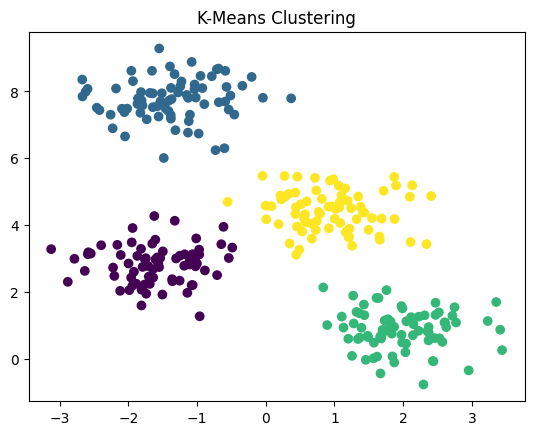

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)
# fit the data to the KMeans algorithm
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

In [10]:

# Let's practice on diamond dataset

df = sns.load_dataset('diamonds')
df.head(3)



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


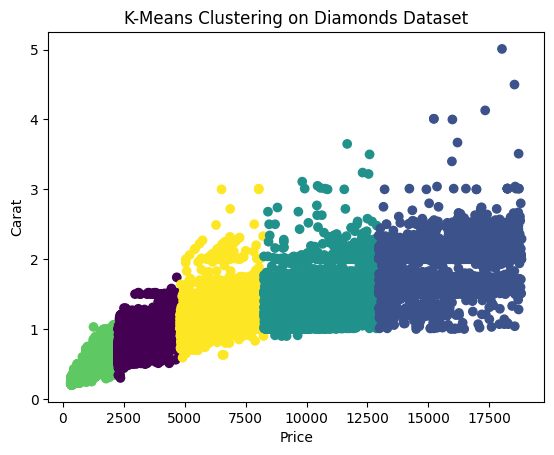

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = sns.load_dataset('diamonds')

X = df[['price', 'carat']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='labels', ylabel='price'>

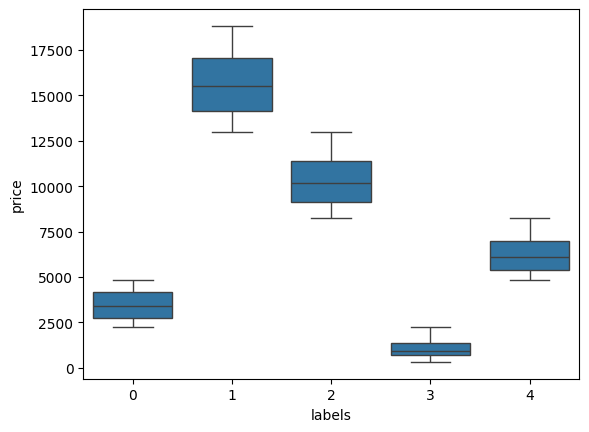

In [12]:
sns.boxplot(x='labels', y='price', data=df)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


In [14]:
df.labels.unique()

array([3, 0, 4, 2, 1])

In [15]:
import plotly.express as px
fig = px.parallel_coordinates(diamonds, color="labels")
fig.show() 

NameError: name 'diamonds' is not defined

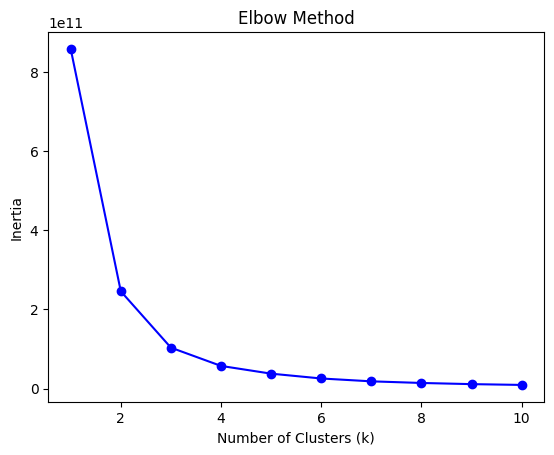

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

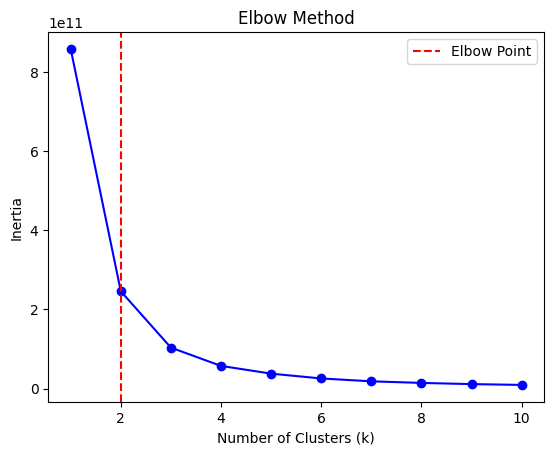

The best number of clusters based on the Elbow Method is: 2


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
# Find the best number of clusters based on the Silhouette Method
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Add a vertical line to indicate the best number of clusters
plt.axvline(x=best_k, color='r', linestyle='--', label='Best Number of Clusters')

plt.legend()
plt.show()

print("The best number of clusters based on the Silhouette Method is:", best_k)

KeyboardInterrupt: 

# k means ++ it select farther datapoint instead of nearest
K-Means++ Algorithm: An Introduction
K-Means++ is an improvement over the traditional K-Means algorithm, specifically designed to address one of K-Means' major issues: the sensitivity to initial centroid selection. In the original K-Means, centroids are randomly initialized, which can lead to poor clustering results or slow convergence if the initial centroids are chosen badly. K-Means++ addresses this by providing a more intelligent way of selecting initial centroids.

How K-Means++ Works:
Choose the first centroid randomly: The first centroid is selected randomly from the dataset.

Choose subsequent centroids:

For each remaining point, calculate its distance to the nearest centroid that has already been chosen.
Select the next centroid with a probability proportional to the square of the distance from the point to the nearest centroid. This ensures that points that are farther from the existing centroids are more likely to be selected as the next centroids.
Repeat until all 
𝑘
k centroids are chosen.

Run standard K-Means on the chosen centroids.

Why K-Means++?
Better initialization: By selecting centroids that are far apart, K-Means++ tends to lead to better results and faster convergence.
Reduces the likelihood of poor local minima: Traditional K-Means can often get stuck in poor local minima because of bad initial centroids. K-Means++ reduces this risk.


In [19]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Focus on 'carat' and 'price'
data = diamonds[['carat', 'price']]


In [20]:
# 2. Preprocess the Data
# Scale the data before applying K-Means++ or K-Means.


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [21]:
# 3. Apply K-Means++
# By default, the KMeans algorithm in scikit-learn uses K-Means++ initialization. Let’s use it with 
# 𝑘
# =
# 3
# k=3 clusters.


# Apply K-Means++ (default)
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=42)
diamonds['Cluster_KMeans++'] = kmeans_plus.fit_predict(scaled_data)

# Get the centroids
centroids_plus = scaler.inverse_transform(kmeans_plus.cluster_centers_)

In [22]:
# 4. Apply Regular K-Means (Random Initialization)
# For comparison, we will apply K-Means with random initialization of centroids.


# Apply K-Means (random initialization)
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42)
diamonds['Cluster_KMeans'] = kmeans_random.fit_predict(scaled_data)

# Get the centroids
centroids_random = scaler.inverse_transform(kmeans_random.cluster_centers_)

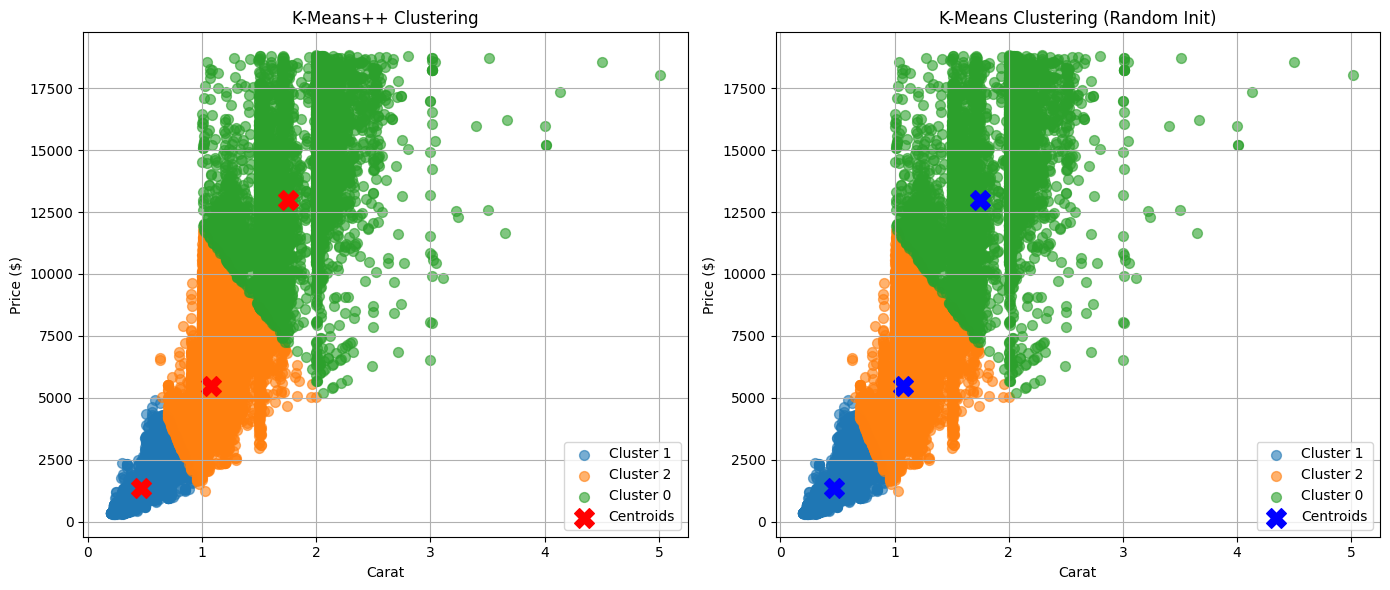

In [23]:
# Plot K-Means++
plt.figure(figsize=(14, 6))

# K-Means++ clustering
plt.subplot(1, 2, 1)
for cluster in diamonds['Cluster_KMeans++'].unique():
    cluster_data = diamonds[diamonds['Cluster_KMeans++'] == cluster]
    plt.scatter(cluster_data['carat'], cluster_data['price'], label=f'Cluster {cluster}', alpha=0.6, s=50)
plt.scatter(centroids_plus[:, 0], centroids_plus[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means++ Clustering')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# K-Means (Random Initialization) clustering
plt.subplot(1, 2, 2)
for cluster in diamonds['Cluster_KMeans'].unique():
    cluster_data = diamonds[diamonds['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data['carat'], cluster_data['price'], label=f'Cluster {cluster}', alpha=0.6, s=50)
plt.scatter(centroids_random[:, 0], centroids_random[:, 1], c='blue', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (Random Init)')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Comparison and Interpretation of Results:
K-Means++:

The centroids are more spread out and better reflect the true structure of the data.
Clusters are well-separated, and the centroids are positioned in the middle of each group.
K-Means (Random Initialization):

The centroids may be less optimal, and some clusters may overlap.
In some cases, K-Means with random initialization can produce poor results if the initial centroids are close to each other or poorly chosen.
Key Takeaways:
K-Means++ usually performs better and converges faster than standard K-Means because it intelligently selects the initial centroids, making it less likely to fall into suboptimal solutions.
K-Means (random) can still work but might need more iterations and can give inconsistent results depending on where the centroids are initially placed.